# Multiple Linear Regression
## Prediction of Car Prices

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**So interpretation is important!**

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
prices = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
prices.head()

,car_ID,symboling,Company,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,NaN,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,NaN,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,NaN,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,NaN,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
prices.describe()

,car_ID,symboling,Company,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,0.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,NaN,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
Company             0 non-null float64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower   

In [122]:
prices.drop_duplicates(subset=None, keep='first', inplace=True)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
5,2,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
6,1,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
7,1,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
8,1,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,...,0,0,0,0,0,0,0,0,0,0
9,0,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,...,0,0,0,0,0,0,0,0,0,0


In [7]:
prices['company'] = ''

In [8]:
prices['company'] = prices['CarName'].str.split(' ',1,expand = True)

In [9]:
prices['company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: company, dtype: object

In [10]:
prices.head()

,car_ID,symboling,Company,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,NaN,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,NaN,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,NaN,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,NaN,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
def binary_map(x):
    return x.map({'two': 2, "three": 3, 'four':4, 'five':5, 'six': 6, 'eight': 8, 'twelve': 12})

# Applying the function to the housing list
prices['doornumber'] = binary_map(prices['doornumber'])
prices['cylindernumber'] = binary_map(prices['cylindernumber'])

In [12]:
prices.drop(['CarName'],axis = 1,inplace = True)

In [13]:
prices.drop(['car_ID'],axis = 1,inplace = True)

In [14]:
prices.drop(['Company'],axis = 1,inplace = True)

In [15]:
prices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

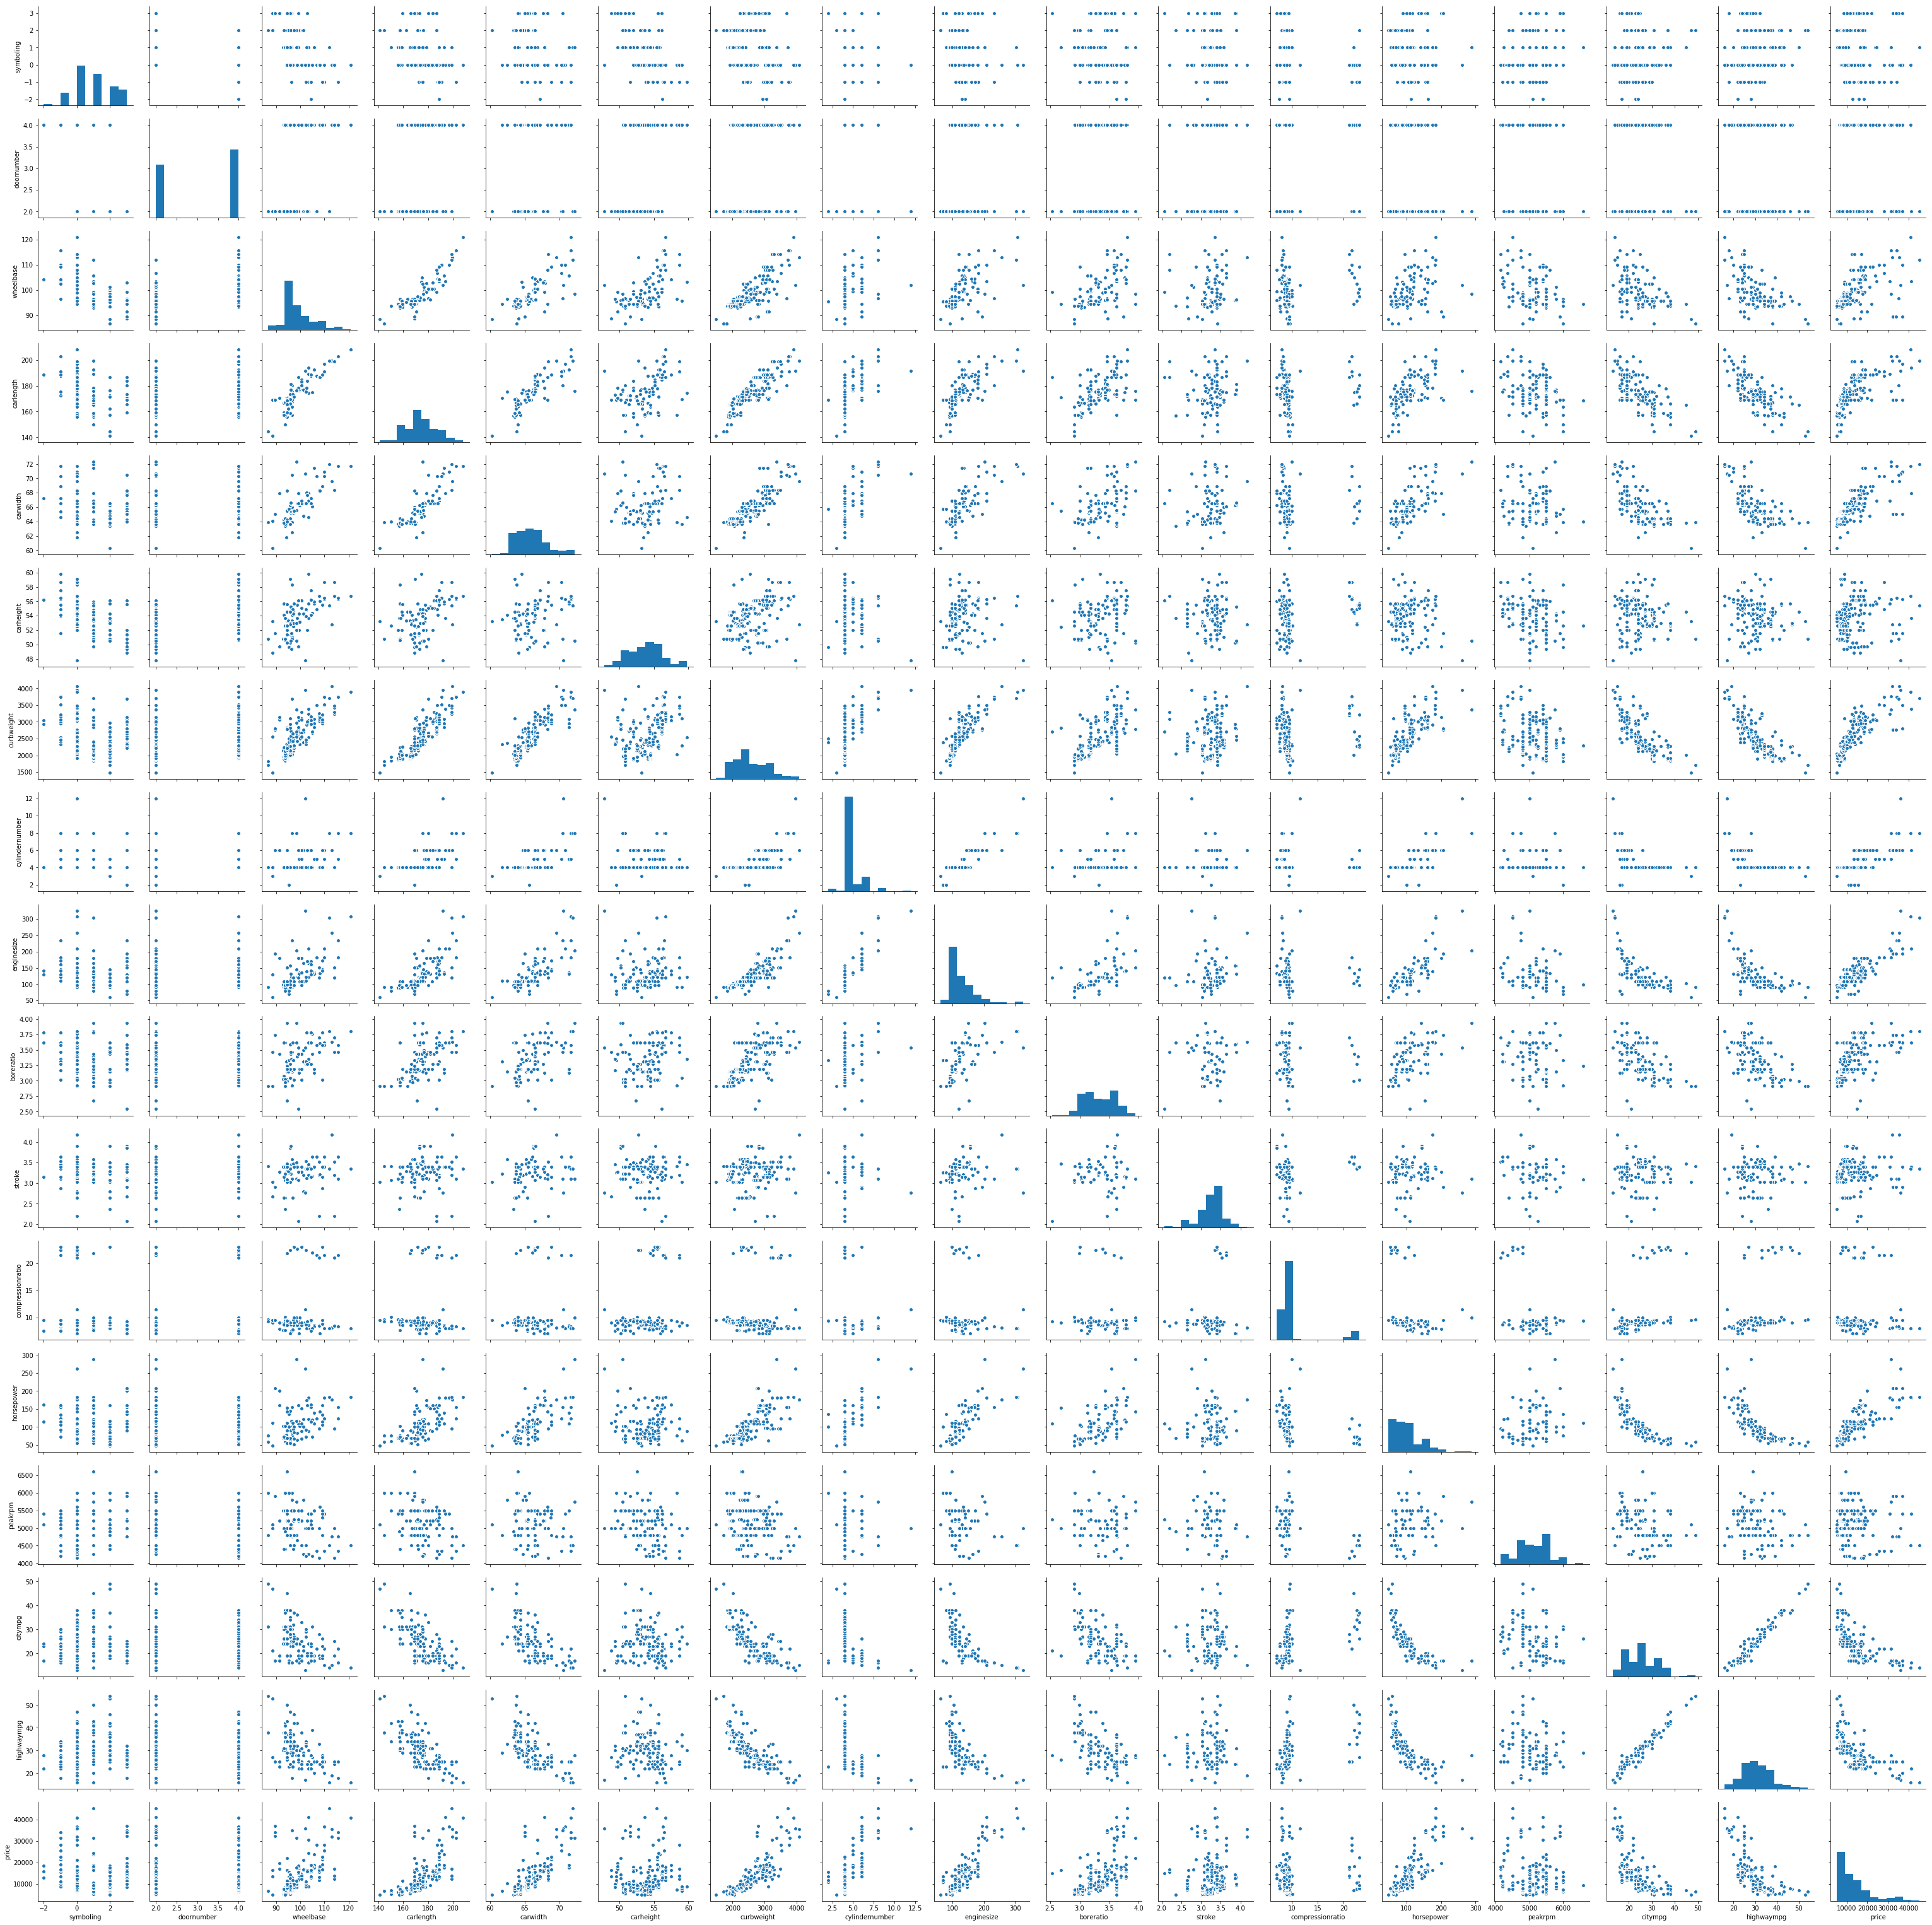

In [17]:
sns.pairplot(prices)
plt.show()

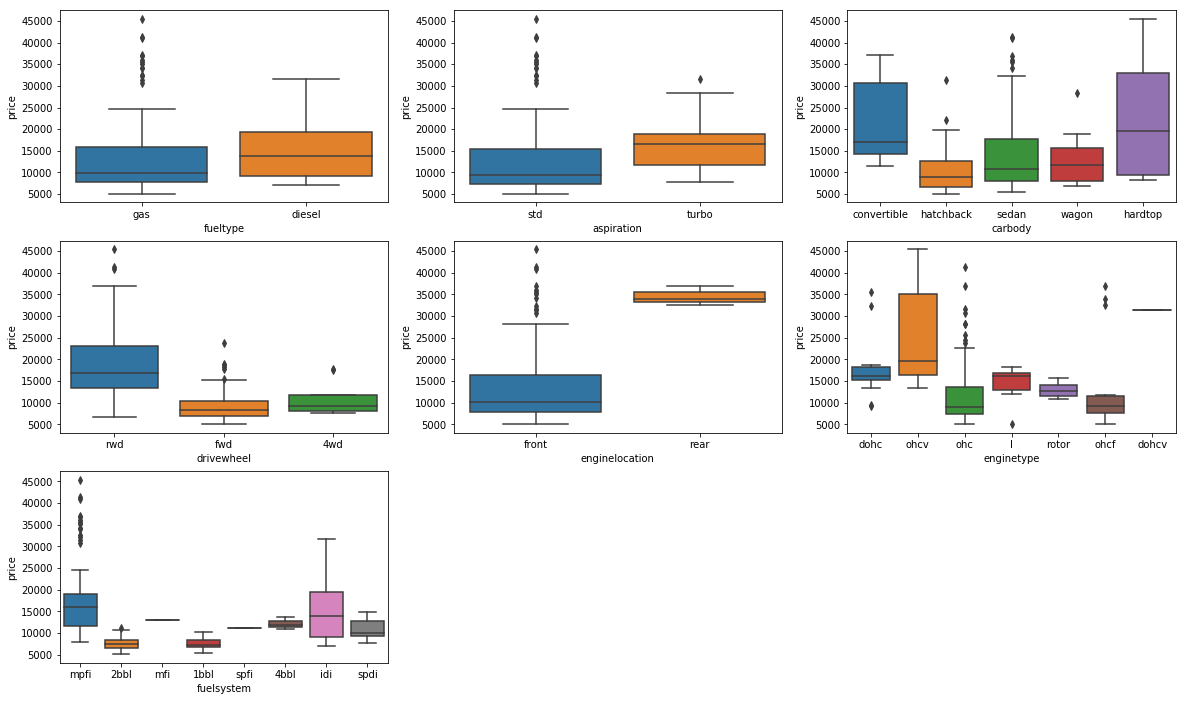

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = prices)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = prices)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = prices)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = prices)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = prices)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = prices)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = prices)

plt.show()

In [19]:
prices['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
prices.company[(prices['company'] == 'vokswagen') | (prices['company'] == 'vw')] = 'volkswagen'
prices.company[(prices['company'] == 'porcshce')] = 'porsche'
prices.company[(prices['company'] == 'toyouta')] = 'toyota'
prices['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [21]:
prices.shape

(205, 25)

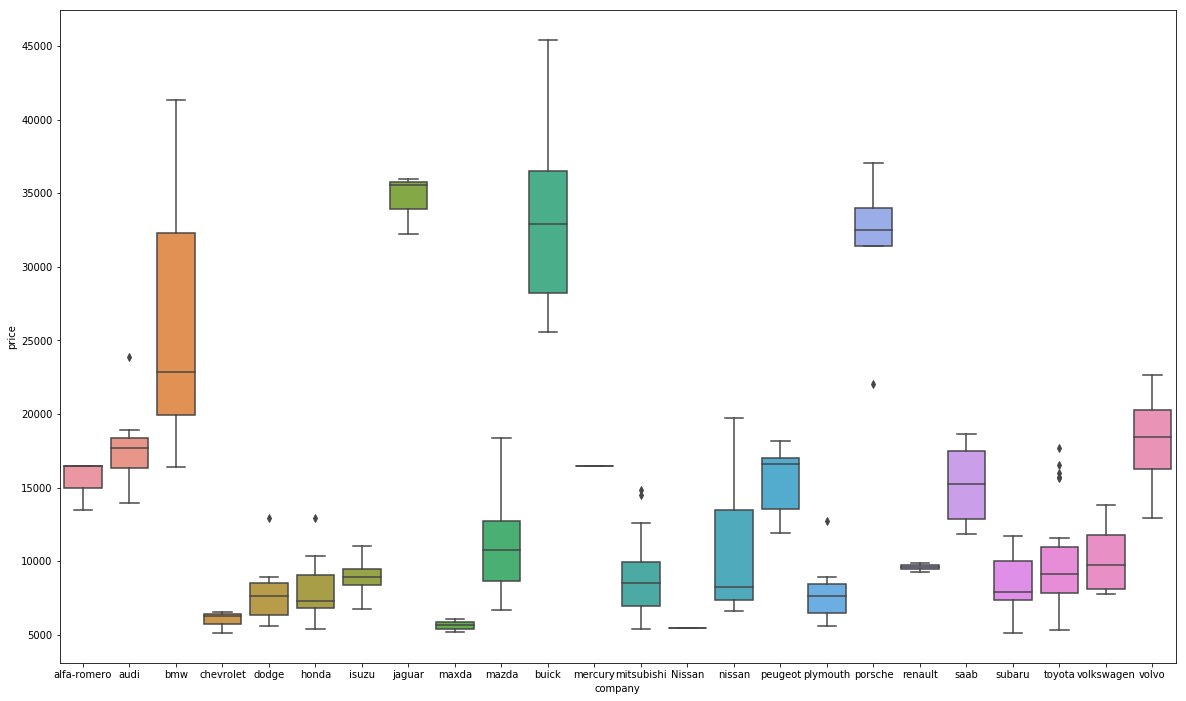

In [22]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'company', y = 'price', data = prices)

plt.show()

### Dummy Variables

The variable `fueltype` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [23]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(prices['fueltype'])

In [24]:
status.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(prices['fueltype'], drop_first = True)

In [26]:
status.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [27]:
# Let's drop the first column from status df using 'drop_first = True'

status1 = pd.get_dummies(prices['aspiration'], drop_first = True)
status2 = pd.get_dummies(prices['carbody'], drop_first = True)
status3 = pd.get_dummies(prices['drivewheel'], drop_first = True)
status4 = pd.get_dummies(prices['enginelocation'], drop_first = True)
status5 = pd.get_dummies(prices['enginetype'], drop_first = True)
status6 = pd.get_dummies(prices['fuelsystem'], drop_first = True)
status7 = pd.get_dummies(prices['company'], drop_first = True)

In [28]:
# Add the results to the original housing dataframe

prices = pd.concat([prices, status,status1,status2,status3,status4,status5,status6,status7], axis = 1)

In [29]:
prices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [30]:
prices.drop(['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','company'], axis = 1, inplace = True)

In [31]:
prices.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [32]:
prices.shape

(205, 62)

In [33]:
prices.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(prices, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','cylindernumber',
            'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,...,0.090909,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,...,0.288490,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


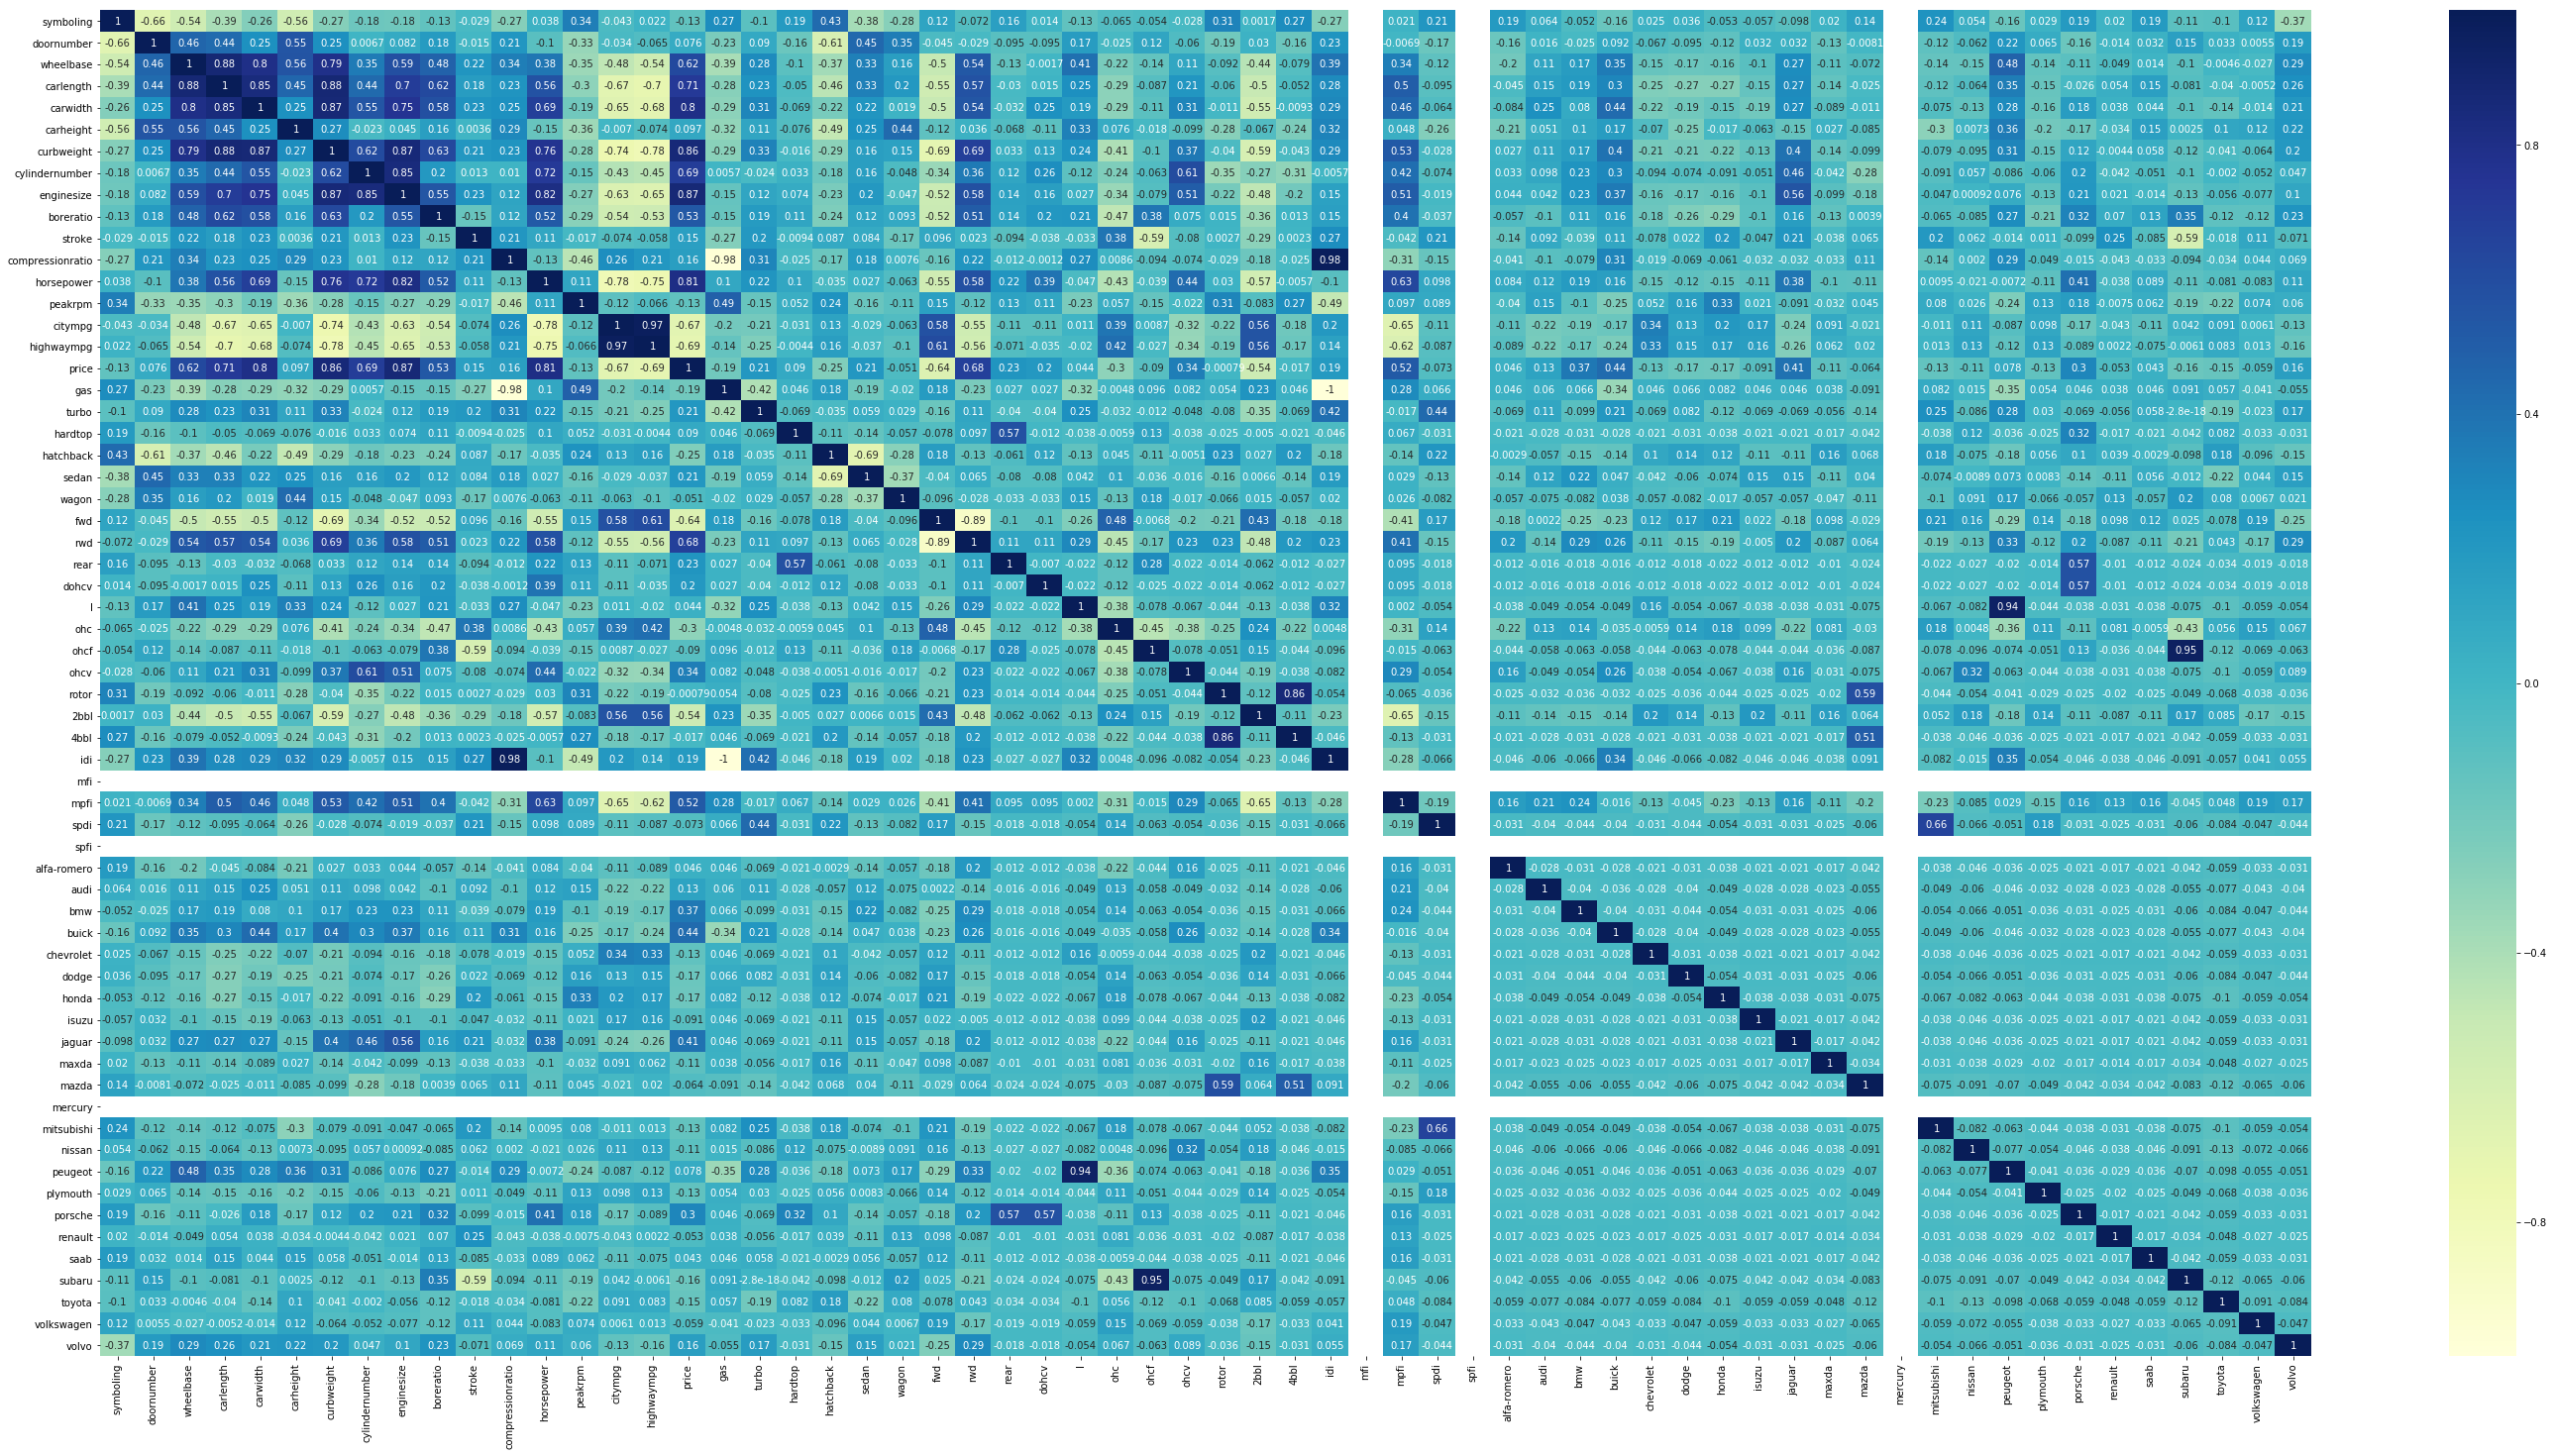

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [41]:
import plotly.plotly as py
import plotly 
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='anshul14july', api_key='1pQjy4tjirRCZgtObCzo')

data = [go.Heatmap( z=df_train.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap')

PlotlyRequestError: No message

As you might have noticed, `curbweight`, `enginesize`, `horsepower` seems to the correlated to `price` the most. Let's see a pairplot for these `variables` vs `price`.

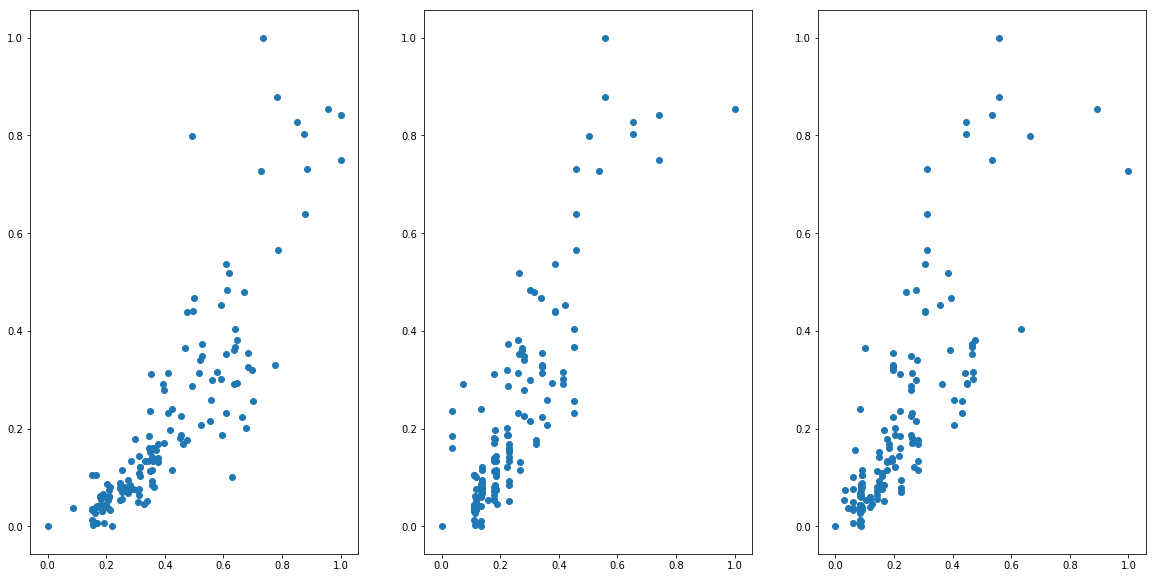

In [42]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.scatter(df_train.curbweight, df_train.price)

plt.subplot(1,3,2)
plt.scatter(df_train.enginesize, df_train.price)

plt.subplot(1,3,3)
plt.scatter(df_train.horsepower, df_train.price)

plt.show()

### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 33),
 ('doornumber', False, 39),
 ('wheelbase', False, 13),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', False, 16),
 ('highwaympg', False, 27),
 ('gas', False, 8),
 ('turbo', False, 5),
 ('hardtop', False, 19),
 ('hatchback', False, 18),
 ('sedan', False, 20),
 ('wagon', False, 21),
 ('fwd', False, 34),
 ('rwd', False, 38),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 23),
 ('ohcf', False, 22),
 ('ohcv', False, 44),
 ('rotor', False, 2),
 ('2bbl', False, 28),
 ('4bbl', False, 25),
 ('idi', True, 1),
 ('mfi', False, 45),
 ('mpfi', False, 41),
 ('spdi', False, 42),
 ('spfi', False, 47),
 ('alfa-romero', False, 26),
 ('audi', False, 30),
 ('bmw', True, 1),
 ('buick', False, 7),
 ('chev

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'rear', 'dohcv', 'l', 'idi',
       'bmw', 'peugeot', 'porsche'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'horsepower', 'citympg', 'highwaympg', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.94e-68
Time:                        10:54:33   Log-Likelihood:                 214.35
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     127   BIC:                            -349.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1591      0.071  

`compressionratio` is insignificant in presence of other variables; can be dropped

In [53]:
X_train_new = X_train_rfe.drop(["compressionratio"], axis = 1)

Rebuilding the model without `compressionratio`

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [55]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.91e-69
Time:                        10:56:03   Log-Likelihood:                 213.70
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     128   BIC:                            -353.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1326      0.066      1.

In [57]:
X_train_new_2 = X_train_rfe.drop(['compressionratio',"porsche"], axis = 1)

Rebuilding the model without `porsche`

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_2)

In [59]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.52e-69
Time:                        10:56:31   Log-Likelihood:                 211.62
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     129   BIC:                            -353.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1270      0.067      1.

In [61]:
X_train_new_2.columns

Index(['const', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw',
       'peugeot'],
      dtype='object')

In [62]:
X_train_new_2 = X_train_new_2.drop(['const'], axis=1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,46.78
3,enginesize,42.26
0,carwidth,38.95
2,cylindernumber,21.87
5,stroke,10.94
4,boreratio,10.26
12,peugeot,10.18
9,l,9.41
6,peakrpm,8.36
10,idi,1.92


`curbweight` is insignificant in presence of other variables; can be dropped

In [64]:
X_train_new_3 = X_train_rfe.drop(["curbweight",'compressionratio','porsche'], axis = 1)

Rebuilding the model without `curbweight`

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_3)

In [66]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.66e-68
Time:                        10:57:11   Log-Likelihood:                 204.63
No. Observations:                 143   AIC:                            -383.3
Df Residuals:                     130   BIC:                            -344.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1975      0.067      2.

In [68]:
X_train_new_3.columns

Index(['const', 'carwidth', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot'],
      dtype='object')

In [69]:
X_train_new_3 = X_train_new_3.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.80
2,enginesize,25.61
1,cylindernumber,20.42
4,stroke,10.81
3,boreratio,10.13
11,peugeot,10.10
8,l,9.41
5,peakrpm,8.21
9,idi,1.89
6,rear,1.21


In [71]:
X_train_new_4 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth'], axis = 1)

Rebuilding the model without `carwidth`

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_4)

In [73]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     78.11
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.29e-52
Time:                        10:57:54   Log-Likelihood:                 161.57
No. Observations:                 143   AIC:                            -299.1
Df Residuals:                     131   BIC:                            -263.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2185      0.090      2.

In [75]:
X_train_new_5 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l'], axis = 1)

Rebuilding the model without `l`

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_5)

In [77]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [78]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.41
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.17e-53
Time:                        10:58:08   Log-Likelihood:                 161.45
No. Observations:                 143   AIC:                            -300.9
Df Residuals:                     132   BIC:                            -268.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2269      0.088      2.

In [79]:
X_train_new_6 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l','peugeot'], axis = 1)

Rebuilding the model without `peugeot`

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_6)

In [81]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [82]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.78
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.07e-53
Time:                        10:58:15   Log-Likelihood:                 160.84
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     133   BIC:                            -272.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.088      2.

In [83]:
X_train_new_6.columns

Index(['const', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'rear', 'dohcv', 'idi', 'bmw'],
      dtype='object')

In [84]:
X_train_new_6 = X_train_new_6.drop(['const'], axis=1)

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,22.07
0,cylindernumber,19.90
3,stroke,10.23
4,peakrpm,7.57
2,boreratio,7.56
7,idi,1.64
8,bmw,1.14
5,rear,1.11
6,dohcv,1.11


In [86]:
X_train_new_7 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l','peugeot','enginesize'], axis = 1)

Rebuilding the model without `enginesize`

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_7)

In [88]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [89]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     58.06
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.37e-40
Time:                        10:58:43   Log-Likelihood:                 123.95
No. Observations:                 143   AIC:                            -229.9
Df Residuals:                     134   BIC:                            -203.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5168      0.054     -9.

In [90]:
X_train_new_8 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l','peugeot','enginesize','dohcv'], axis = 1)

Rebuilding the model without `enginesize`

In [91]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_8)

In [92]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [93]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     66.05
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.62e-40
Time:                        10:58:48   Log-Likelihood:                 123.28
No. Observations:                 143   AIC:                            -230.6
Df Residuals:                     135   BIC:                            -206.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5011      0.052     -9.

In [94]:
X_train_new_8.columns

Index(['const', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm', 'rear',
       'idi', 'bmw'],
      dtype='object')

In [95]:
X_train_new_8 = X_train_new_8.drop(['const'], axis=1)

In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,9.31
3,peakrpm,5.59
0,cylindernumber,5.43
1,boreratio,5.42
5,idi,1.62
6,bmw,1.13
4,rear,1.07


In [97]:
X_train_new_9 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l','peugeot',
                                  'enginesize','dohcv','stroke'], axis = 1)

Rebuilding the model without `stroke`

In [98]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_9)

In [99]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [100]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     66.12
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.48e-38
Time:                        10:59:16   Log-Likelihood:                 114.57
No. Observations:                 143   AIC:                            -215.1
Df Residuals:                     136   BIC:                            -194.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3714      0.044     -8.

In [101]:
X_train_new_10 = X_train_rfe.drop(["curbweight",'compressionratio','porsche','carwidth','l','peugeot',
                                  'enginesize','dohcv','stroke','rear'], axis = 1)

Rebuilding the model without `rear`

In [102]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_10)

In [103]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [105]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     77.16
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.05e-38
Time:                        10:59:33   Log-Likelihood:                 112.70
No. Observations:                 143   AIC:                            -213.4
Df Residuals:                     137   BIC:                            -195.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3910      0.043     -8.

In [106]:
X_train_new_10.columns

Index(['const', 'cylindernumber', 'boreratio', 'peakrpm', 'idi', 'bmw'], dtype='object')

In [107]:
X_train_new_10 = X_train_new_10.drop(['const'], axis=1)

In [108]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,5.03
0,cylindernumber,4.75
2,peakrpm,3.36
3,idi,1.29
4,bmw,1.13


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [109]:
y_train_price = lm.predict(X_train_lm)

In [110]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,0,'Errors')

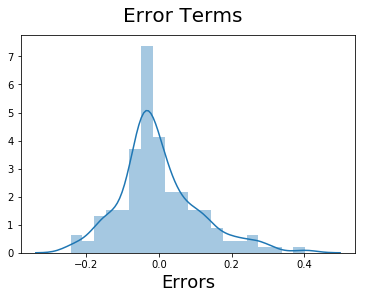

In [111]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [112]:
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','cylindernumber',
            'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [113]:
y_test = df_test.pop('price')
X_test = df_test

In [114]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [115]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

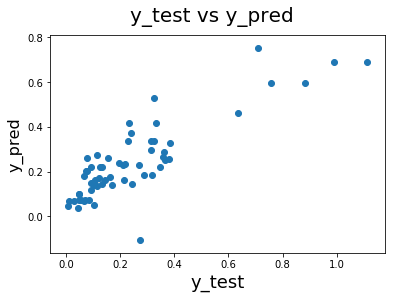

In [116]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7128185412553023